In [1]:
import pandas as pd
test_file_path='~/Downloads/test 2.csv'
test_dataset=pd.read_csv(test_file_path)
# use first 50 rows for dataset
test_dataset = test_dataset.head(50)

In [6]:
from dspy_utils import PersonalizedSummary, Assess
import dspy
summarize = dspy.ChainOfThought(PersonalizedSummary)
assess = dspy.ChainOfThought(Assess)

def test_personalized_summary(df,length=50,style="formal"):
    # empty dictionary to store the results
    results = {}
    documents = []
    summaries = []
    summary_scores = []
    gt_scores = []

    # for each row, get the document and the summary
    for i in range(len(df)):
        document = df.iloc[i]['article']
        summary = summarize(document=document,length=length,style=style,context="").summary

        gt_summary = df.iloc[i]['highlights']
        summary_score = assess(original_document=document,summary=summary, length=length, style=style, context="").score
        gt_score = assess(original_document=document,summary=gt_summary, length=length, style=style, context="").score

        documents.append(document)
        summaries.append(summary)
        summary_scores.append(summary_score)
        gt_scores.append(gt_score)
    
    results['documents'] = documents
    results['summaries'] = summaries
    results['summary_scores'] = summary_scores
    results['gt_scores'] = gt_scores
    return results


In [7]:
result=test_personalized_summary(test_dataset)

In [10]:
result_df=pd.DataFrame(result)
# save the results to a csv file
result_df.to_csv('~/Downloads/personalized_summary_results_exp1.csv',index=False)

In [16]:
import matplotlib.pyplot as plt
def plot_score_comparison(df):
    """
    Create a simple line plot comparing summary_scores and gt_scores.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing 'summary_scores' and 'gt_scores' columns
    """
    # Create figure and axis
    plt.figure(figsize=(10, 6))
    
    # Create line plots for both scores
    plt.plot(df['summary_scores'], marker='o', label='Summary Scores')
    plt.plot(df['gt_scores'], marker='o', label='Ground Truth Scores')
    
    # Add labels and title
    plt.xlabel('Document Index')
    plt.ylabel('Scores')
    plt.title('Summary Scores vs Ground Truth Scores')
    
    # Add legend
    plt.legend()
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    plt.show()

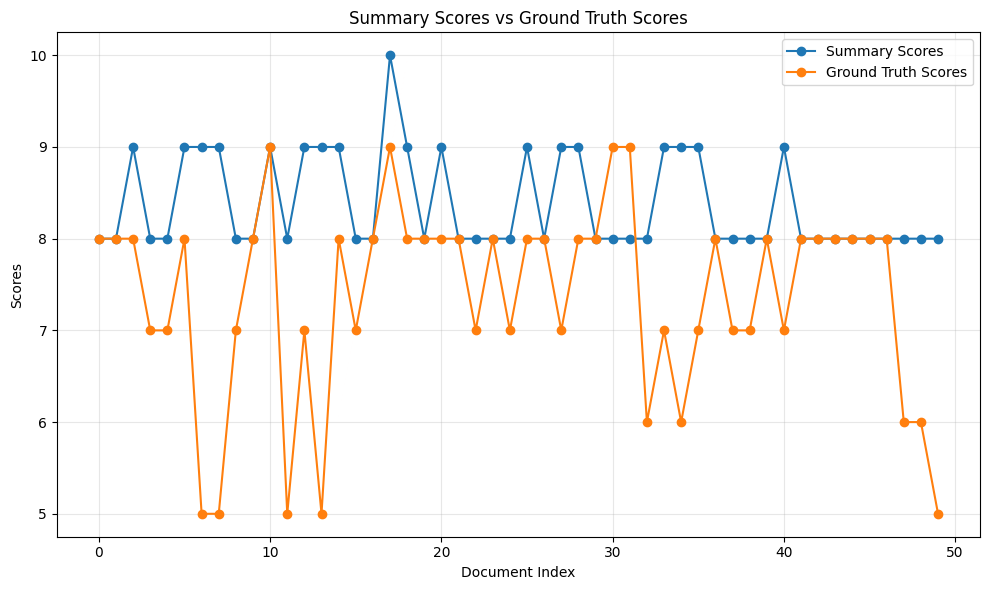

In [17]:
plot_score_comparison(result_df)